# Dragon Curve

<img src="DragonIter12.png" alt="picture of paper folded" title="Title text"  />

I first came across the Dragon curve by watching this [Numberphile video](https://www.youtube.com/watch?v=wCyC-K_PnRY). The video explains how a dragon curve can be constructed by folding a paper. After watching the video I decided to try to figure out a recursive formula without looking at other sources and then make a small animation in java using [processing](https://processing.org/). In this notebook, I will take through the journey that I followed to find different patterns. The code is presented in python but can easily be translated into other languages.<br>



## Folding papers
To make the dragon curve by folding, first take a long strip of paper. Fold that paper in half, then fold it again in half and again and again... Unfold the paper and wherever there a crease make a 90 degree angle.<br>
The picture below shows the result after 4 folds.<br>
<img src="paper1.jpg" alt="picture of paper folded" title="Title text"  />
To find some pattern, each fold can be represented with 0 or 1. A 0 represents a "valley" when the paper is unfolded and a 1 a mountain as shown on the picture below.
<img src="paper2.jpg" alt="picture of paper folded" title="Title text"  />

Below is a table showing the different sequences obtained for different amout of folds.

|     |     |     |    |     |     |    |     |     |    |     |     |    |     |     | 
| --- | --- | --- |--- | --- | --- |--- | --- | --- |--- | --- | --- |--- | --- | --- |
|     |     |     |    |     |     |    |  1  |     |    |     |     |    |     |     | 
|     |     |     |    |     |     | 0  |  1  | 1   |    |     |     |    |     |     | 
|     |     |     |    |  0  |  0  | 1  |  1  | 0   |  1 | 1   |     |    |     |     | 
|  0  |  0  | 1   | 0  |  0  |  1  |  1 |  1  |  0  |  0 |   1 |  1  | 0  |  1  |  1  | 

The number of elements in the sequence appear to grow quickly as the number of folds increase.

|  Number of folds   |  Number of elements   |  
| --- | --- | 
|   1  |   1  | 
|  2   |    3 | 
|  3   |    7 | 
|  4   |   15  | 

It is easy to deduce the number of elements after the $n^{th}$ iteration is $2^{n}-1$. This is not surprising as each fold doubles the number of layers. As this an exponential function, it will grow extremely quickly and this will limit the number of iterations that we will be able to make. At 20 iterations, the number of element is already over 1 million.

## A first construction - arrays, 1 and 0's

When looking at the paper as it is unfolded, it can be noticed that the lastest fold, create a new crease at each end of the strip as well as between each crease made from the previous folds. The first new crease is always a 0 and then the new creases alternate.<br>
This creates a pattern to construct the dragon curve.<br>
If the previous sequence is 1, then the next sequence is <span style="color:red">0</span>,0,<span style="color:red">1</span><br>
If the previous sequence is 0,1,1, then the next sequence is <span style="color:red">0</span>,0,<span style="color:red">1</span>,1,<span style="color:red">0</span>,1,<span style="color:red">1</span><br>
If the previous sequence is 0,0,1,1,0,1,1, then the next sequence is <span style="color:red">0</span>,0,<span style="color:red">1</span>,0,<span style="color:red">0</span>,1,<span style="color:red">1</span>, 1,<span style="color:red">0</span>,0,<span style="color:red">1</span>,1,<span style="color:red">0</span>,1,<span style="color:red">1</span><br>
The black numbers is the previous sequence and the red ones in between are just alternating 0's and 1's.<br><br>
This pattern is enough to start coding a recursive formula using arrays (or lists) as we just have to insert 0's and 1's between each element in the arry.

In [1]:
#importing the libraries needed
import numpy as np
import time
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual, IntSlider, jslink, HBox, Play,FloatSlider, Layout

%matplotlib inline
import timeit
plt.rcParams['agg.path.chunksize'] = 10000

In [2]:
def dragon_insert(iter_num):
    #create a numpy array with one element
    d = np.array(1)
    for i in range(iter_num):
        #loop over the length of d
        for j in range(2**i):
            #insert 0's and 1's every other element
            #the factor of 4 is there as the array grows as elements are added
            d = np.insert(d, 4*j, 0)
            d = np.insert(d, 4*j+2, 1)
    return d

There is some symmetry in the order elements are inserted.<br>
When a 0 is added at the first place, a 1 is added at the end.<br>
When a 1 is inserted at the 3rd place, a 0 is inserted at the 3rd place from the end at the end.<br>
This can be used to reduce the length of a loop by a factor of 2.

In [3]:
def dragon_insert_with_sym(iter_num):
    #create a numpy array with one element
    d = np.array([0,1,1])
    for i in range(iter_num):
        #loop over the length of d
        for j in range(int(2**(i-1))):
            #insert 0's and 1's every other element
            #the factor of 4 is there as the array grows as elements are added
            d = np.insert(d, 4*j, 0)
            d = np.insert(d, 4*j+2, 1)
            #add one and zero to the end position
            d = np.insert(d, -3*j-1, 1)
            d = np.insert(d, -3*j-2, 0)
            
    return d

In [4]:
for i in range(4):
    print(dragon_insert_with_sym(i))

[0 1 1]
[0 1 1]
[0 0 1 1 0 1 1]
[0 0 1 0 0 1 1 1 0 0 1 1 0 1 1]


This seems to work fine but the problem is that the np.insert() operation is costly and the running time grows quickly.

In [5]:
%timeit dragon_insert(15)
%timeit dragon_insert_with_sym(15)

4.31 s ± 218 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.8 s ± 547 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Deque

Another way to tackle the problem could be using the Python Deque data structure.
The method is similar to the previous one. <br>
A deque (d)is initialized with just a 1. Then the following steps are repeated:<br>
1) While d is not empty<br>
2) create a temporary Deque (a)<br>
3) Add a 0 at the end of a<br>
4) Pop the first element of d and make it the last element of a<br>
5) Add a 1 at the end of a<br>
6) If d is not empty, pop the first element of d and make it the last element of a<br>
7) Once d is empty, copy a into d<br>

In [6]:
from collections import deque

def dragon_deque(iter_num):
    #create a numpy array with one element
    d = deque([1])
    for i in range(iter_num):
        #create an empty deque
        a = deque()
        while(d): 
            a.append(0)
            a.append(d.popleft())
            a.append(1)
            if d:
                a.append(d.popleft())
        d = a.copy()
    return d

In [7]:
for i in range(4):
    print(dragon_deque(i))

deque([1])
deque([0, 1, 1])
deque([0, 0, 1, 1, 0, 1, 1])
deque([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1])


This is a much more efficient algorithm as now it only takes only 20ms as opposed to 2s to generate the 15 iteration.

In [8]:
%timeit dragon_deque(15)

42.8 ms ± 6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


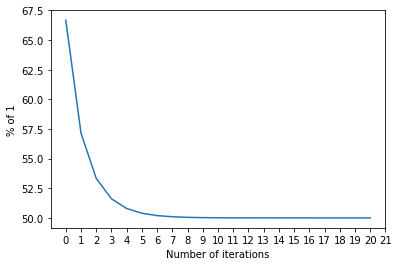

In [9]:
def count_ratio():
    ratios = np.array([])
    for i in range(1,22):
        d = dragon_deque(i)
        ratios = np.append(ratios, np.count_nonzero(d)/len(d)*100)
    return ratios

plt.xticks([int(i) for i in range(23)])
plt.xlabel('Number of iterations')
plt.ylabel('% of 1')
plt.plot(count_ratio())

The graph above shows that the ratios of 0's to 1's tends to 1 as the number of iterations increases.

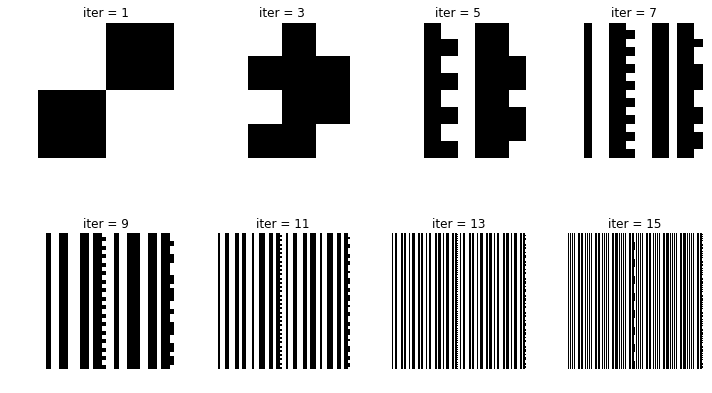

In [10]:

fig, axs = plt.subplots(2, 4,figsize=(10,6))
for i in range(2):
    for j in range(4):
        it = 8*i+2*j+1
        d = dragon_deque(it)
        d = np.append(d,0)
        l = int(np.sqrt(len(d)))
        d =np.reshape(d, (l, l))
        axs[i, j].imshow(d,cmap='Greys',interpolation='nearest')
        axs[i,j].axis('off') 
        axs[i,j].set_title('iter = '+str(it))
fig.tight_layout()
plt.show()

The graphs above show the distribution of 0's (white) and 1's (black) for different number of iterations. The fractal pattern of the sequence can clearly be seen.

## Geometrical construction
In order to visualize the curve, sequence of 1's and 0's need to be converted to coordinates. It will be convenient to use 1 unit as the length of each segment of the curve. The 0 in the sequence can be interpreted as a turn to the right and a 1 as turn to the left.<br>
To draw the second iteration [0,1,1] of the curve, start with a horizontal unit length line segment between (0,0) and (1,0).<br>
The first element of the sequence is a 0, so a turn to the left needs to be made so the coordinates of the next point is now (1,1). Next is a 1, so a turn to the right must be made, and the new point is (2,1). Finally another turn to the left is made and the last point obtained is (2,0).


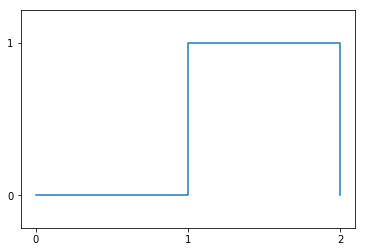

In [11]:
d = np.array([[0,0],[1,0],[1,1],[2,1],[2,0]])
plt.plot(d[:,0],d[:,1])
plt.axis('equal')
plt.xticks([0,1,2])
plt.yticks([0,1])
plt.show()

To translate the sequence of 0's and 1's into coordinates the current direction needs to be kept in a variable and then the rotation is applied. For example if the current direction is North and the next element in the sequence is a 0, then we need to add a point to the left (-1 unit in the x, same y) and then the new direction becomes West.<br>

<b>Directions:</b><br>
0 = East<br>
1 = South<br>
2 = West<br>
3 = North<br>
<br>
0: turn to the left<br>
1: turn to the right<br>

In [12]:
def dragon_coord(binary_seq):
    #start with a line segment facing East
    direction = 0
    coor = np.array([[0,0],[1,0]])
    #convert the array as numpy array
    d = np.asarray(dragon_insert(binary_seq))
    #loop throught the sequence
    for i in range(len(d)):
        if d[i]==0:
            if direction == 0:
                coor = np.append(coor, [[coor[-1][0],coor[-1][1]+1]], axis = 0)
                direction = 3
            
            elif direction == 1:
                coor = np.append(coor, [[coor[-1][0]+1,coor[-1][1]]], axis = 0)
                direction = 0
            
            elif direction == 2:
                coor = np.append(coor, [[coor[-1][0],coor[-1][1]-1]], axis = 0)
                direction = 1
            
            elif direction == 3:
                coor = np.append(coor, [[coor[-1][0]-1,coor[-1][1]]], axis = 0)
                direction = 2
        else:
            if direction == 0:
                coor = np.append(coor, [[coor[-1][0],coor[-1][1]-1]], axis = 0)
                direction = 1
            
            elif direction == 1:
                coor = np.append(coor, [[coor[-1][0]-1,coor[-1][1]]], axis = 0)
                direction = 2
            
            elif direction == 2:
                coor = np.append(coor, [[coor[-1][0],coor[-1][1]+1]], axis = 0)
                direction = 3
            
            elif direction == 3:
                coor = np.append(coor, [[coor[-1][0]+1,coor[-1][1]]], axis = 0)
                direction = 0
        
    return coor

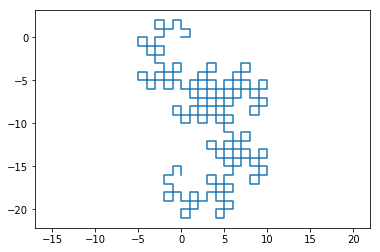

In [13]:
coor = dragon_coord(7)
plt.plot(coor[:,0],coor[:,1])
plt.axis('equal')
plt.show()

In [14]:
%timeit dragon_coord(15)

10.8 s ± 1.22 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Again this is rather slow as we need to through the full array one more time after generating it to transform it into coordinates.<br>
In the next section we will see how both can be done in one step.

## Rotation and matrices
Yet another way to draw a dragon curve is to use rotation.<br>
Starting from a line segment. Rotate the line segment by 90 degrees about the end point.
Apply more rotation for the full shape about the end point and the dragon curve will be generated.<br>
To do this we can use the rotation matrix:<br>
<center>$\begin{bmatrix}
    cos(\theta)       & sin(\theta)  \\
    -sin(\theta)      & cos(\theta)  \\
\end{bmatrix}$</center><br><br>

Here are the steps required:<br>
Make a copy of the array.<br>
A transformation needs to be made to all the points so that the last point in the array becomes the origin. This can be done by subtracting the coordinates of the last point to all the points in the array.<br>
Then each of the points need to be multiplied by the rotation matrix.<br>
Transform back to the origin by adding the coordinates of the last point to all the points in the array.<br>
Reverse the array and add the points to the original array.<br>



In [15]:
def dragon_rot(x,theta=np.pi/2):
    d = np.array([[0,0],[1,0]])
    #rotation matrix
    b = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
    for i in range(x):
        trans_d = d-d[-1]
        temp_d = (d[-1]+np.array([np.matmul(b,i) for i in trans_d]))[:-1]
        d = np.concatenate((d, np.flip(temp_d,0)), axis=0)
    return d

In [16]:
%timeit dragon_rot(15)

87.7 ms ± 3.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


This is a very fast way to generate the points and they can be plotted easily.

In [17]:
#Function to plot the dragon curve
def dragon_plot(num_iter, theta_deg=90):
    '''
    num_iter: number of iterations
    theta: angle of folding
    '''
    theta_rad = np.deg2rad(theta_deg)
    d = dragon_rot(num_iter,theta_rad)
    fig=plt.figure(figsize=(6, 6), dpi= 100)
    plt.plot(d[:,0],d[:,1])
    plt.axis('equal')
    plt.axis('off')
    plt.style.use('dark_background')
    #Uncomment to save the graph as pdf
    #plt.savefig("dragonPDF"+str(num_iter)+".pdf")
    #plt.close()

One good thing about using the rotation matrix is that then the angle of the fold can be changed from 90 degrees to any other angles. This can be done using the interactive graph below.

In [18]:
layout = Layout(width='600px')
slider_x = IntSlider(min=0,max=19, value=7,description='# iterations', layout = layout)


slider_theta = FloatSlider(min=0,max=180, value=90, step = 0.01,description='Angle (deg)', layout = layout)
interact_manual(dragon_plot, num_iter=slider_x,theta_deg=slider_theta)
plt.show()


interactive(children=(IntSlider(value=7, description='# iterations', layout=Layout(width='600px'), max=19), Fl…

The two graphs below have a animation bar at the bottom so that the curve can be seen beeing developed for different iterations and angles.

In [19]:
play_x = Play(value=0,min=0,max=15,step=1)
slider_x = IntSlider(min=0,max=15, value=0,description='# iterations',layout = Layout(width='600px'))
jslink((play_x, 'value'), (slider_x, 'value'))

slider_theta = IntSlider(min=0,max=360, value=90,description='Angle (deg)',layout = Layout(width='600px'))


interact(dragon_plot, num_iter=slider_x,theta_deg=slider_theta)
HBox([play_x, slider_x])

interactive(children=(IntSlider(value=0, description='# iterations', layout=Layout(width='600px'), max=15), In…

In [20]:

slider_x = IntSlider(min=0,max=12, value=7,description='# iterations',layout = Layout(width='600px'))

play_theta = Play(value=90,min=0,max=360,step=1)
slider_theta = IntSlider(min=0,max=360, value=90,description='Angle (deg)',layout = Layout(width='600px'))
jslink((play_theta, 'value'), (slider_theta, 'value'))

interact(dragon_plot, num_iter=slider_x,theta_deg=slider_theta)
HBox([play_theta, slider_theta])


interactive(children=(IntSlider(value=7, description='# iterations', layout=Layout(width='600px'), max=12), In…

The cell below shows how an animation can be exported as a mp4 file or embedded in a jupyter notebook.

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline


Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Briag Dupont'), bitrate=8000)


fig = plt.figure(figsize=(19.2, 10.8),dpi=100)
ax = fig.add_subplot(111)
line, = ax.plot([], [], '-')

def init():
    line.set_data([], [])
    return line,

ite = 5

def animate(i):
    d = dragon_rot(ite,i)
    line.set_data(d[:,0],d[:,1])
    ax.set_xlim(np.min(d[:,0])*1.1, np.max(d[:,0])*1.1)
    ax.set_ylim(np.min(d[:,1])*1.1, np.max(d[:,1])*1.1)
    plt.style.use('dark_background')
    
    ax.set_axis_off()
    return line,



ani = animation.FuncAnimation(fig, animate,frames=np.arange(0.001, np.pi, 0.001),interval=100, blit=True, init_func=init)

ani.save('dragon'+str(ite)+'.mp4', writer=writer)


In [ ]:
#This will embed 
rc('animation', html='jshtml')
HTML(ani.to_jshtml())

## From dragon curve to music


In [ ]:
dragon_plot(5)

In [ ]:
iter_num = 5
d = dragon_rot(iter_num)
d_binary = np.array(dragon_deque(iter_num))
print('x Min:',np.min(d[0:]),' and Max:',np.max(d[0:]))
print('y Min:',np.min(d[1:]),' and Max:',np.max(d[1:]))
print('Number of notes: ',(np.max(d[0:])-np.min(d[0:])+1)*(np.max(d[1:])-np.min(d[1:])+1))
d = (d-np.min(d[0:])).astype(int)
notes = np.arange(36,100).reshape(8,8)



In [13]:
from midiutil import MIDIFile
track = 0
channel = 0
time =0 # In beats
duration =1 # In beats
tempo = 60 # In BPM
volume = 100 # 0-127, as per the MIDI standard


MyMIDI = MIDIFile(1) # One track, defaults to format 1 (tempo track # automatically created)
MyMIDI.addTempo(track,time, tempo)

for i in range( len(d)):
    if d_binary[i] ==0:
        duration+=1
    else:
        duration-=1
    MyMIDI.addNote(track, channel, notes[d[i,0],d[i,1]], time, duration, volume) 
    time = time + 1

with open("dragon.mid", "wb") as output_file: MyMIDI.writeFile(output_file)
